In [13]:
debug = True

def filename(delta, mu, d, T, ic_seed, seed):
    return f"computation-database/{'debug' if debug else ''}/H3H3_delta{delta}_mu{mu}_d{d}_T{T}_icseed{ic_seed}_seed{seed}.npz"

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from simulation_conf import *

colors = ['red', 'blue', 'green', 'orange', 'purple']

seed = 1


def plotter(mu, ds):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    for i, d in enumerate(ds):
        delta = get_delta(mu, d)
        T = get_T(delta, mu, d)
        data = np.load(filename(delta, mu, d, T, ic_seed, seed))
        gd_plain_errors = data['gd_plain_errors']
        gd_correlation_errors = data['gd_correlation_errors']
        projected_gd_plain_errors = data['projected_gd_plain_errors']
        projected_gd_correlation_errors = data['projected_gd_correlation_errors']
        spherical_gd_plain_errors = data['spherical_gd_plain_errors']
        spherical_gd_correlation_errors = data['spherical_gd_correlation_errors']
        #
        gd_plain_m = data['gd_plain_m']
        gd_correlation_m = data['gd_correlation_m']
        projected_gd_plain_m = data['projected_gd_plain_m']
        projected_gd_correlation_m = data['projected_gd_correlation_m']
        spherical_gd_plain_m = data['spherical_gd_plain_m']
        spherical_gd_correlation_m = data['spherical_gd_correlation_m']

        ax.plot(np.arange(T+1)[::max(1,T//1000)], projected_gd_correlation_m[::max(1,T//1000)], label=f'Projected GD Correlation d={d}', marker='x', color=colors[i], ls='')
        ax.plot(np.arange(T+1)[::max(1,T//1000)], spherical_gd_plain_m[::max(1,T//1000)], label=f'Spherical GD Plain d={d}', marker='o', color=colors[i], ls='')
        ax.plot(np.arange(T+1)[::max(1,T//1000)], spherical_gd_correlation_m[::max(1,T//1000)], label=f'Spherical GD Correlation d={d}', marker='<', color=colors[i], ls='')
        ax.plot(np.arange(T+1)[::max(1,T//1000)], projected_gd_plain_m[::max(1,T//1000)], label=f'Projected GD Plain d={d}', marker='s', color=colors[i], ls='')
    ax.legend()
    ax.set_title(f"$\\mu={mu}$")
    ax.set_xlabel('$T$')
    ax.set_ylabel('m')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_ylim(-.1, 1)
    ax.set_xlim(0,T/2)
    plt.show()


/var/folders/3y/pmdmcpp90qd21qvn_rlmvvfr0000gn/T/ipykernel_98923/1388563393.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,T/2)


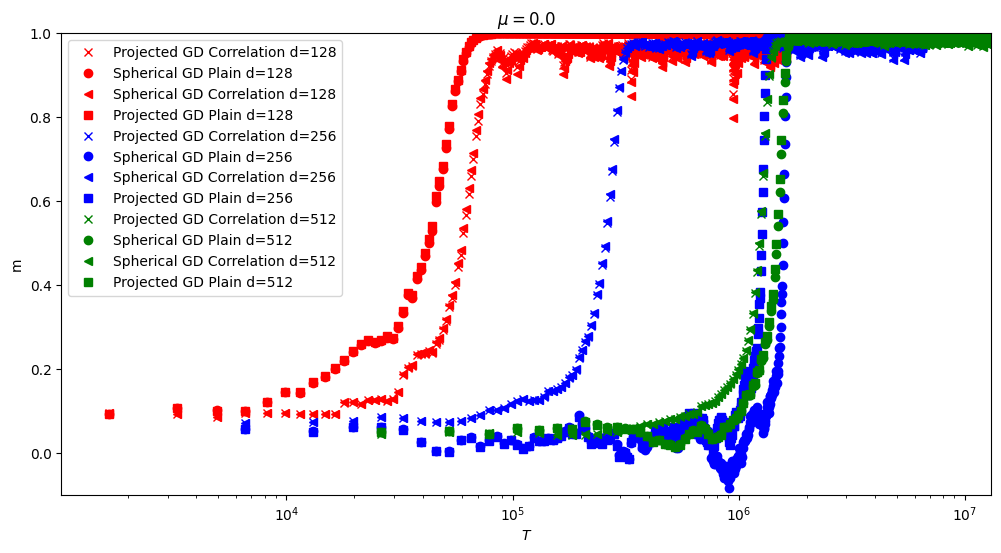

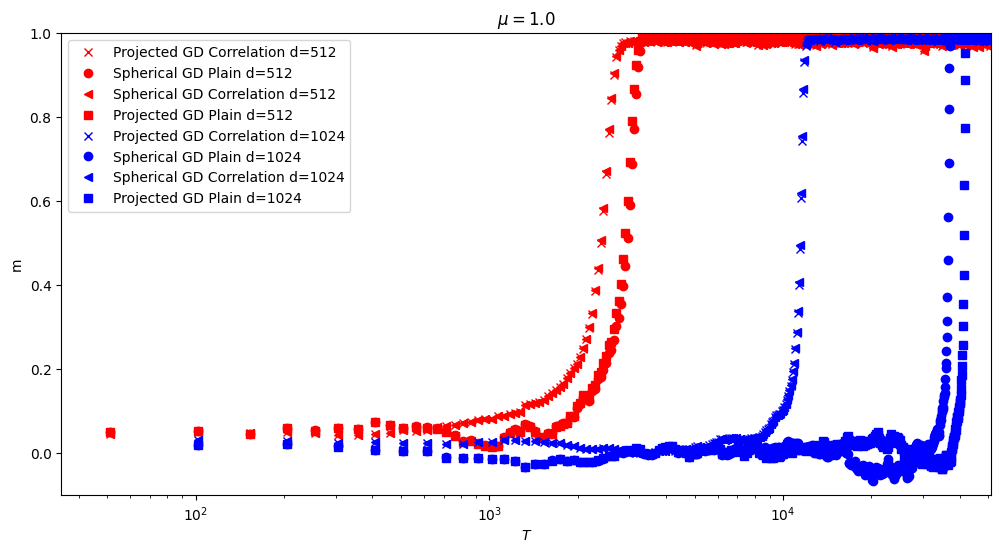

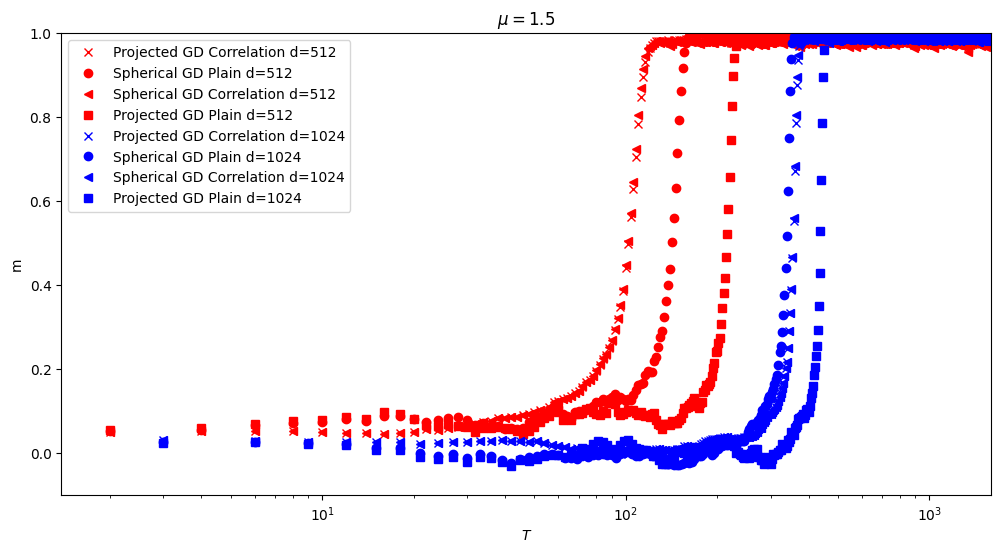

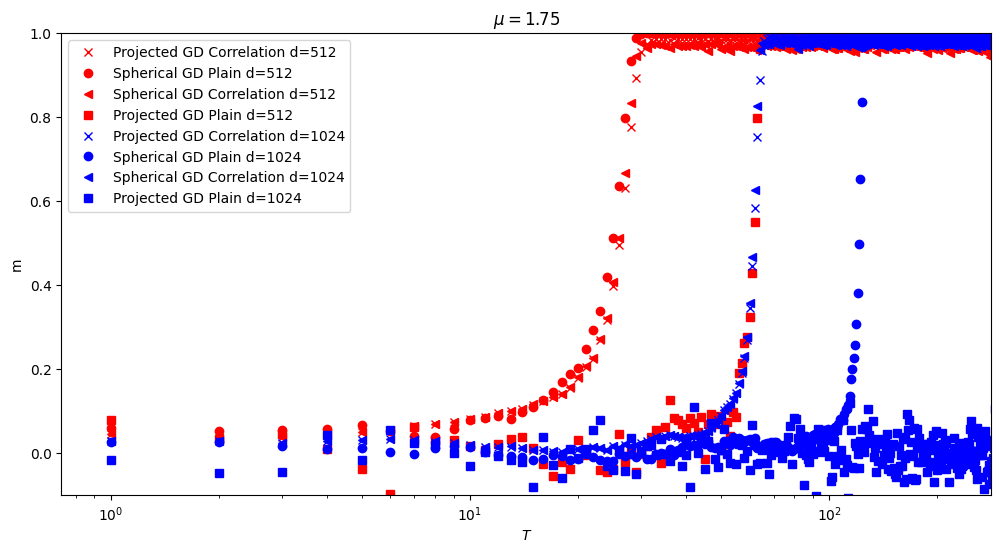

In [15]:
for mu in mus:
    if mu == 0.:
        plotter(mu, ds[1:-1])
    else:
        plotter(mu, ds[3:])